In [1]:
import pandas as pd
import numpy as np

In [3]:
pd.__version__ 

'2.2.2'

In [5]:
pd.read_csv('https://andybek.com/pandas-drinks')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [7]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [11]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

In [13]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [15]:
type(alcohol)

pandas.core.frame.DataFrame

In [17]:
alcohol.size

193

In [19]:
alcohol

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [21]:
alcohol.values

array([[ nan],
       [ 54.],
       [ 14.],
       [312.],
       [ 45.],
       [ 45.],
       [221.],
       [ 11.],
       [212.],
       [191.],
       [  5.],
       [ 51.],
       [  7.],
       [ nan],
       [ 36.],
       [ 42.],
       [212.],
       [  8.],
       [ 13.],
       [ nan],
       [  8.],
       [  8.],
       [ 35.],
       [ 16.],
       [  1.],
       [ 94.],
       [  7.],
       [ nan],
       [  7.],
       [ 16.],
       [  1.],
       [  4.],
       [  1.],
       [  1.],
       [  1.],
       [172.],
       [  8.],
       [  3.],
       [  1.],
       [  9.],
       [ 74.],
       [ 11.],
       [254.],
       [  5.],
       [113.],
       [134.],
       [ nan],
       [  1.],
       [278.],
       [  3.],
       [ 26.],
       [  9.],
       [  3.],
       [  1.],
       [  2.],
       [233.],
       [ nan],
       [ 59.],
       [ nan],
       [  1.],
       [ 97.],
       [ 37.],
       [ 59.],
       [  1.],
       [149.],
       [175.],
       [  

In [23]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [25]:
alcohol.values.size == alcohol.index.size

True

In [36]:
alcohol.shape

(193, 1)

In [38]:
alcohol.size == alcohol.shape[0]

True

In [40]:
len(alcohol)

193

Unique Values And Series Monotonicity

In [58]:
df = pd.DataFrame(alcohol)

In [68]:
# Check for duplicates across all columns
duplicates = df.duplicated()

In [64]:
# Get the duplicate rows
duplicate_rows = df[duplicates]

print(duplicate_rows)

                   wine_servings
country                         
Antigua & Barbuda           45.0
Bangladesh                   NaN
Belgium                    212.0
Bhutan                       NaN
Bolivia                      8.0
...                          ...
Venezuela                    3.0
Vietnam                      1.0
Yemen                        NaN
Zambia                       4.0
Zimbabwe                     4.0

[121 rows x 1 columns]


# Keep the first occurrence of the duplicate row
df.drop_duplicates(keep='first') 

# Keep the last occurrence of the duplicate row
df.drop_duplicates(keep='last') 

# Drop all duplicate rows
df.drop_duplicates(keep=False) 

In [70]:
alcohol.isnull()

,wine_servings
country,
Afghanistan,True
Albania,False
Algeria,False
Andorra,False
Angola,False
...,...
Venezuela,False
Vietnam,False
Yemen,True


In [84]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [78]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Cote d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'North Korea',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungar

In [80]:
len(list(alcohol[alcohol.isnull()].index))

193

In [88]:
alcohol.isnull().sum()

wine_servings    31
dtype: int64

In [90]:
alcohol.notnull()

,wine_servings
country,
Afghanistan,False
Albania,True
Algeria,True
Andorra,True
Angola,True
...,...
Venezuela,True
Vietnam,True
Yemen,False


In [96]:
alcohol.notna().sum()

wine_servings    162
dtype: int64

Descriptive Statistics

In [99]:
alcohol.sum()

wine_servings    8221.0
dtype: float64

In [101]:
alcohol.count()

wine_servings    162
dtype: int64

In [103]:
# average

In [105]:
alcohol.sum() / alcohol.count()

wine_servings    50.746914
dtype: float64

In [107]:
alcohol.mean()

wine_servings    50.746914
dtype: float64

In [109]:
# median

In [111]:
alcohol.median()

wine_servings    11.5
dtype: float64

In [113]:
alcohol.quantile(.5)

wine_servings    11.5
Name: 0.5, dtype: float64

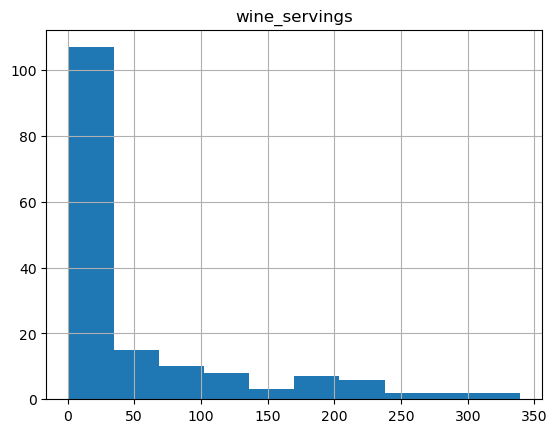

In [115]:
alcohol.hist();

In [117]:
# IQR

In [119]:
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [121]:
iqr

wine_servings    58.25
dtype: float64

In [123]:
# min and max

In [125]:
alcohol.min()

wine_servings    1.0
dtype: float64

In [127]:
alcohol.max()

wine_servings    339.0
dtype: float64

In [129]:
# standard deviation

In [131]:
alcohol.std()

wine_servings    76.134917
dtype: float64

In [133]:
# variance

In [135]:
alcohol.var()

wine_servings    5796.525612
dtype: float64

In [137]:
alcohol.std()**2 == alcohol.var()

wine_servings    True
dtype: bool

The describe() Method

In [141]:
alcohol.describe()

,wine_servings
count,162.000000
mean,50.746914
std,76.134917
min,1.000000
25%,3.000000
50%,11.500000
75%,61.250000
max,339.000000


In [143]:
alcohol.describe(percentiles=[.79, .19])

,wine_servings
count,162.000000
mean,50.746914
std,76.134917
min,1.000000
19%,2.000000
50%,11.500000
79%,81.570000
max,339.000000


In [145]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

,wine_servings
count,162.000000
mean,50.746914
std,76.134917
min,1.000000
19%,2.000000
50%,11.500000
79%,81.570000
max,339.000000


Mode() And value_counts()

In [149]:
# mode

In [151]:
alcohol.mode()

,wine_servings
0,1.0


In [153]:
alcohol == 1

,wine_servings
country,
Afghanistan,False
Albania,False
Algeria,False
Andorra,False
Angola,False
...,...
Venezuela,False
Vietnam,True
Yemen,False


In [163]:
alcohol[alcohol==True].size

193